In [11]:
include("include.jl")

afmize_beta (generic function with 1 method)

[1.000000000000582, 3.658682924757721e-127, 1.1360476456832985e-129, 4.372737143184566e-133]
  0.974597 seconds (1.06 M allocations: 368.835 MiB, 5.32% gc time)
[4.442750265899398e-132, 1.000000000000291, 3.936585039607245e-84, 2.393246534035956e-156]
  0.660502 seconds (878.20 k allocations: 360.859 MiB, 6.03% gc time)
[4.201356221798445e-62, 1.8849675372602708e-26, 1.0, 7.655225530236774e-83]
  0.665926 seconds (878.20 k allocations: 360.859 MiB, 6.27% gc time)
[1.4114218410527208e-59, 7.414946805758685e-96, 2.78686251747317e-96, 0.999999999999709]
  0.647225 seconds (878.20 k allocations: 360.859 MiB, 5.46% gc time)


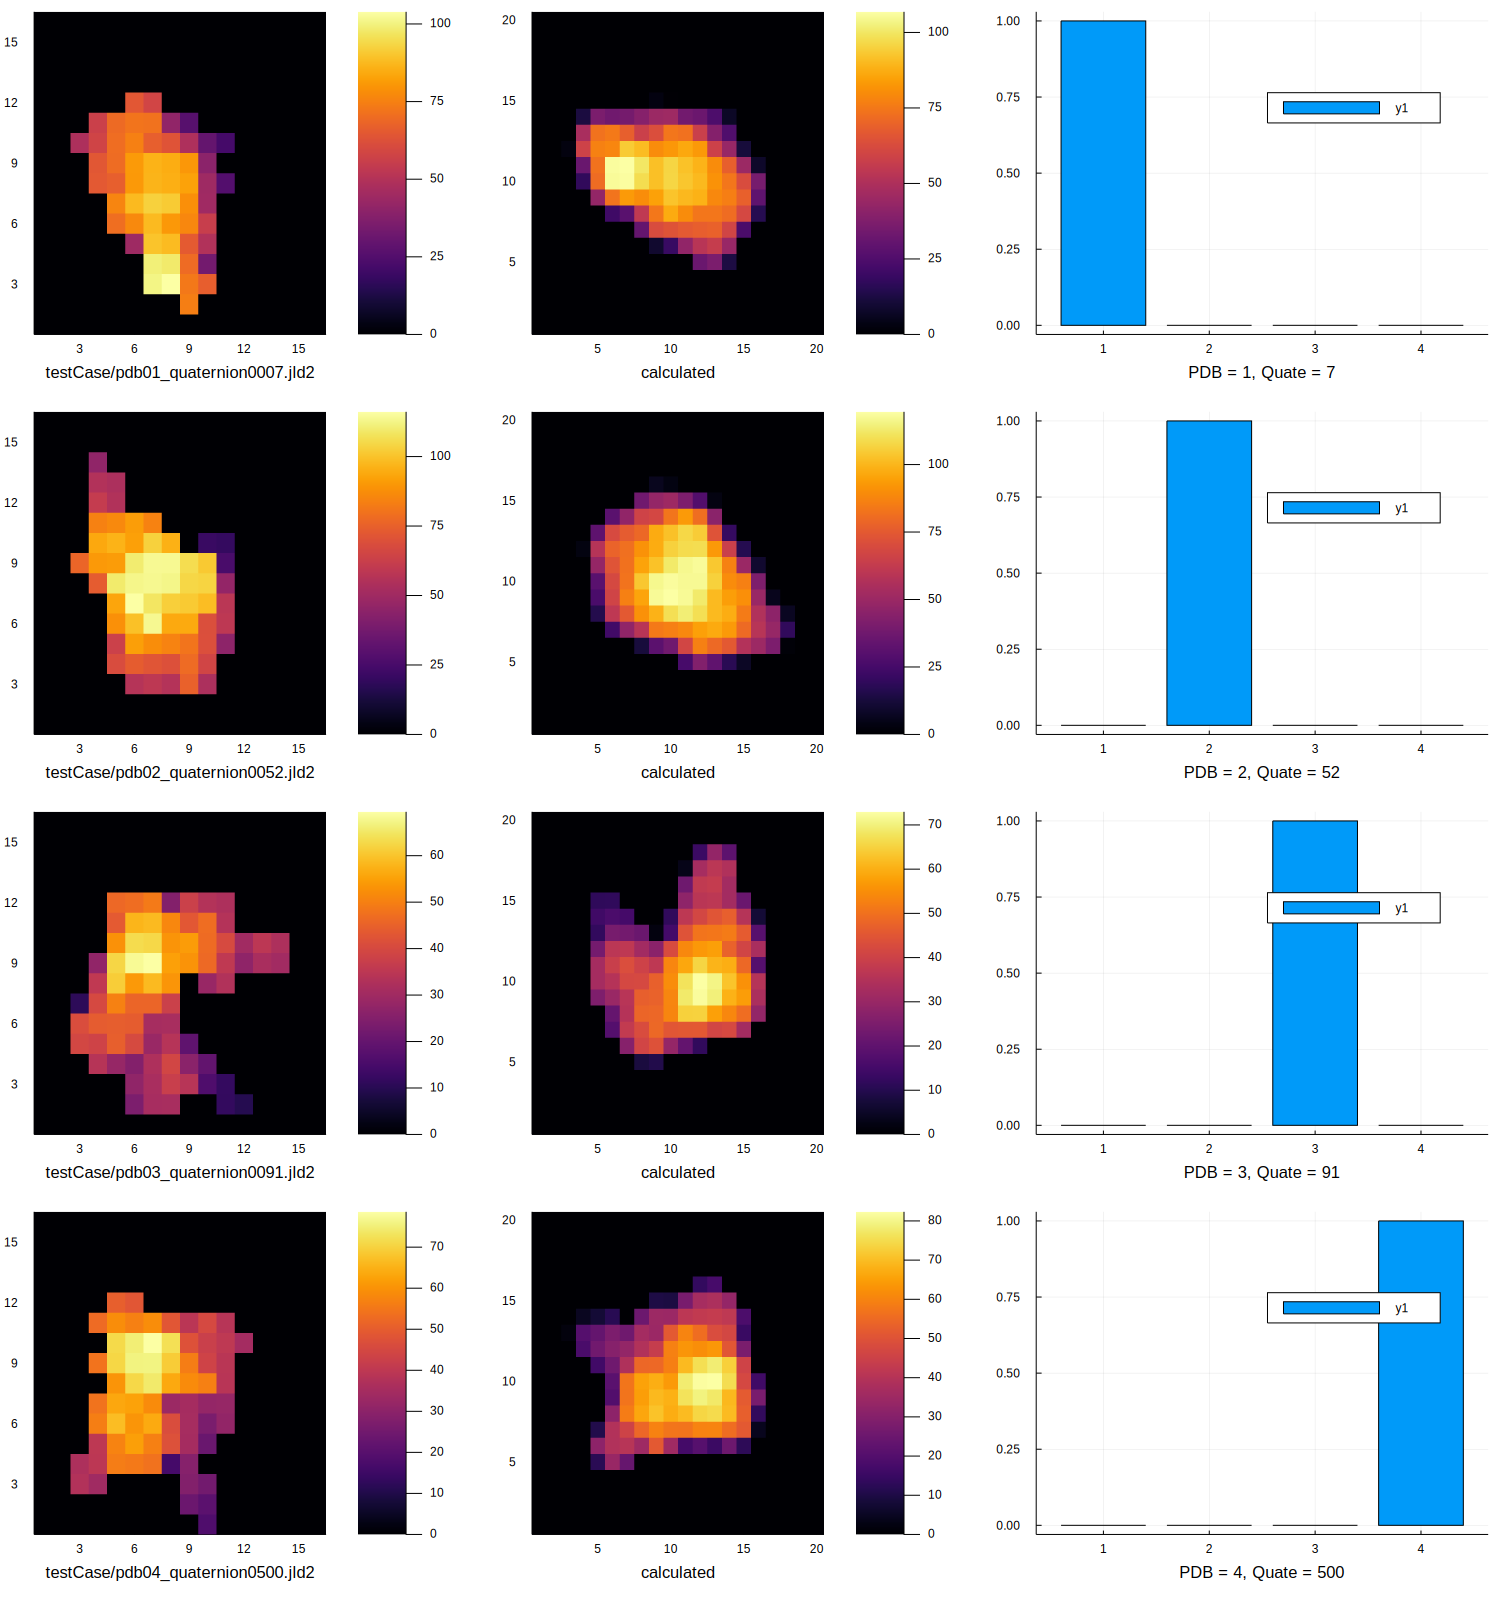

In [12]:
quateList = DelimitedFiles.readdlm("../quaternion/QUATERNION_LIST_576_Orient")
pdbList = [MDToolbox.readpdb("../model/0000$(i).pdb") for i in 1:4]
MDToolbox.decenter!.(pdbList)
@load "./testCase/fileNameList.jld2" fileNameList

resultList = BioAFMResult[]
afmDatas = []

for fileName in fileNameList
    @load fileName afmData
    @time result = BioAFM_QD_FFT(afmData, pdbList, quateList, 10.0)
    push!(afmDatas, afmData)
    push!(resultList, result)
end

plotPredictResultWithAfmize(fileNameList, afmDatas, resultList, pdbList, quateList)